<a href="https://www.kaggle.com/code/eavprog/abscur-pairs-vol?scriptVersionId=219355089" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Волатильности для парных валютных курсов**

См. страницу на сайте [https://www.abscur.ru/p/blog-page_87.html](https://www.abscur.ru/p/blog-page_87.html)


# Диапазоны

In [1]:
import pandas as pd

# Получение сегодняшней даты и вычисление дат в прошлом
today = pd.Timestamp.now().normalize()

days_ago_7 = today - pd.Timedelta(days=7)
month_ago = today - pd.DateOffset(months=1)
quarter_ago = today - pd.DateOffset(months=3)
half_year_ago = today - pd.DateOffset(months=6)
year_ago = today - pd.DateOffset(years=1)
two_years_ago = today - pd.DateOffset(years=2)
three_years_ago = today - pd.DateOffset(years=3)
five_years_ago = today - pd.DateOffset(years=5)
ten_years_ago = today - pd.DateOffset(years=10)

# Создание списка диапазонов и их расшифровок
date_ranges = [
    [month_ago, today, "месяц","1m"],
    [quarter_ago, today, "квартал","1q"],
    [half_year_ago, today, "полгода","y2"],
    [year_ago, today, "год","1y"],
    [two_years_ago, today, "два года","2y"],
    [three_years_ago, today, "три года","3y"],
    [five_years_ago, today, "пять лет","5y"],
    [ten_years_ago, today, "десять лет","10y"]
]

ago_dates = {item[2] : item[0] for item in date_ranges}
period_suffix = {item[2] : item[3] for item in date_ranges}

# Загрузка парных курсов

In [2]:
all_pairs = pd.read_csv('/kaggle/input/abscur2/pairs_close.csv',index_col='Date')
all_pairs.index = pd.to_datetime(all_pairs.index)
all_pairs

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-25,6.1381,92.46000,6.5820,0.78759,94.918,6.6635,1.39890,8.5918,131.22501,1.41341,...,68.7020,3.7580,8.36040,1.34401,32.54,2.3550,31.290,15.8100,21320.0,11.4501
2015-01-26,6.1381,93.87030,6.5820,0.79221,94.918,6.6635,1.39890,8.5918,131.22501,1.41980,...,68.7020,3.7580,8.29077,1.34401,32.54,2.3550,31.290,15.8100,21320.0,11.4501
2015-01-27,6.1434,93.26150,6.4844,0.79214,95.002,6.5965,1.39650,8.5869,130.42999,1.43480,...,67.7000,3.7595,8.18620,1.33837,32.50,2.3631,31.070,15.8995,21320.0,11.5677
2015-01-28,6.1105,92.78060,6.5450,0.78927,93.743,6.6244,1.39990,8.5583,129.72301,1.42960,...,67.8242,3.7585,8.29740,1.35294,32.55,2.3880,31.180,15.8692,21320.0,11.5731
2015-01-29,6.0205,92.01400,6.4182,0.77821,93.733,6.5469,1.39380,8.4014,128.19000,1.45620,...,69.1050,3.7575,8.26040,1.35263,32.76,2.4139,31.560,15.8692,21275.0,11.5467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,4.8839,98.12600,6.8984,0.62750,108.824,7.6506,1.75265,8.5900,172.63200,1.65913,...,99.2010,3.7479,11.00367,1.35519,33.86,35.6390,32.698,42.1661,25050.0,18.4638
2025-01-23,4.8935,98.10203,6.9173,0.62833,108.481,7.6456,1.75315,8.5842,171.98600,1.65769,...,99.9760,3.7503,10.99773,1.35503,33.95,35.6427,32.709,42.0325,25080.0,18.5127
2025-01-24,4.9129,98.45400,6.8936,0.63146,108.697,7.6001,1.74540,8.5981,172.15000,1.66184,...,97.7750,3.7469,10.92390,1.34580,33.53,35.6517,32.730,41.9751,25060.0,18.3785


# Таблица волатильности парных валютных курсов

In [3]:
import pandas as pd

# Создаем пустой DataFrame для хранения результатов
volatilities = pd.DataFrame()

# Вычисляем волатильности для каждой валютной пары в заданных диапазонах
for range_name, start_date in ago_dates.items():
    # Определяем конец диапазона как следующий день после последней даты в all_pairs
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)
    
    # Фильтруем данные по диапазону
    filtered_data = all_pairs.loc[start_date:end_date]
    
    # Вычисляем доходности (относительные изменения)
    returns = filtered_data.pct_change() * 100  # Умножаем на 100 для получения в процентах
    
    # Вычисляем стандартное отклонение доходностей (волатильность)
    volatilities[range_name] = returns.std()

# Настройки отображения для вывода всех строк и столбцов
pd.set_option('display.max_rows', None)  # Выводить все строки
pd.set_option('display.max_columns', None)  # Выводить все столбцы

# Форматируем вывод до 4 знаков после запятой
volatilities = volatilities.round(4)

# Выводим результат
volatilities

,месяц,квартал,полгода,год,два года,три года,пять лет,десять лет
AUDHKD,0.4069,0.5202,0.4980,0.4682,0.5260,0.6234,0.6290,0.5826
AUDJPY,0.4022,0.5944,0.7047,0.6157,0.5968,0.6515,0.6506,0.6546
AUDSEK,0.3572,0.3933,0.4092,0.3706,0.4213,0.4887,0.4761,0.5108
AUDUSD,0.4012,0.5428,0.5226,0.4931,0.5427,0.6233,0.6223,0.5794
CADJPY,0.4176,0.5614,0.6449,0.5570,0.5496,0.6100,0.6084,0.6123
CADSEK,0.3992,0.4270,0.4380,0.4145,0.4710,0.5233,0.5004,0.5134
CHFAUD,0.2993,0.4414,0.5119,0.4597,0.4657,0.5119,0.5350,0.5528
CHFHKD,0.3275,0.4113,0.4301,0.3975,0.4159,0.4582,0.4350,0.4343
CHFJPY,0.4414,0.5055,0.4807,0.4358,0.4746,0.5269,0.4706,0.4664
EURAUD,0.3124,0.3788,0.3886,0.3442,0.3966,0.4625,0.4884,0.5081


# Рейтинги волатильности парных валютных курсов

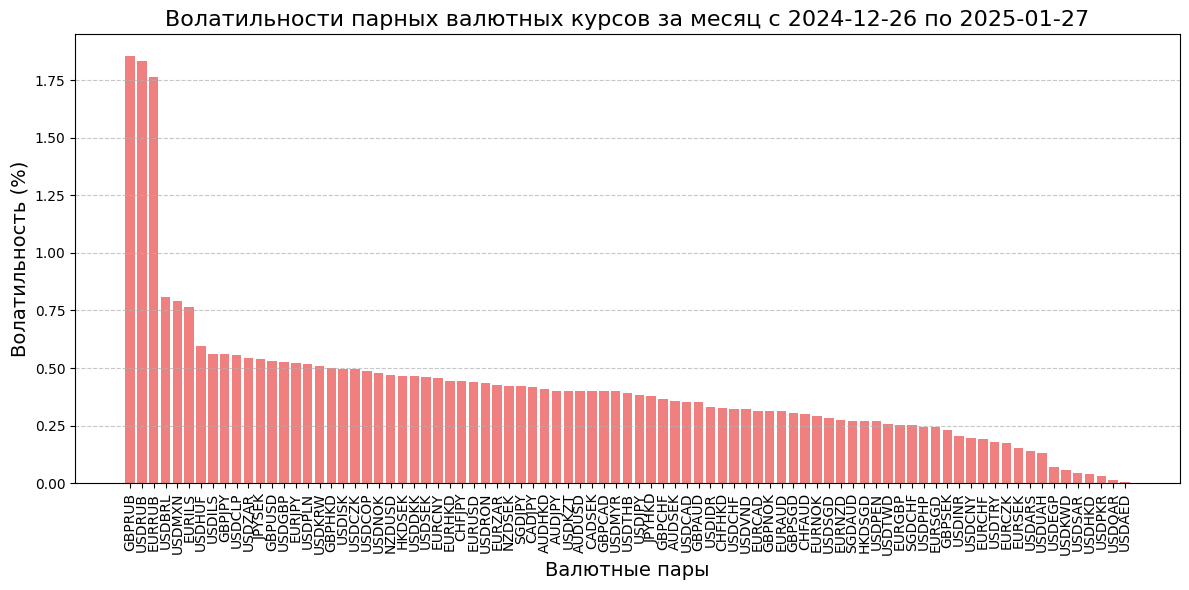

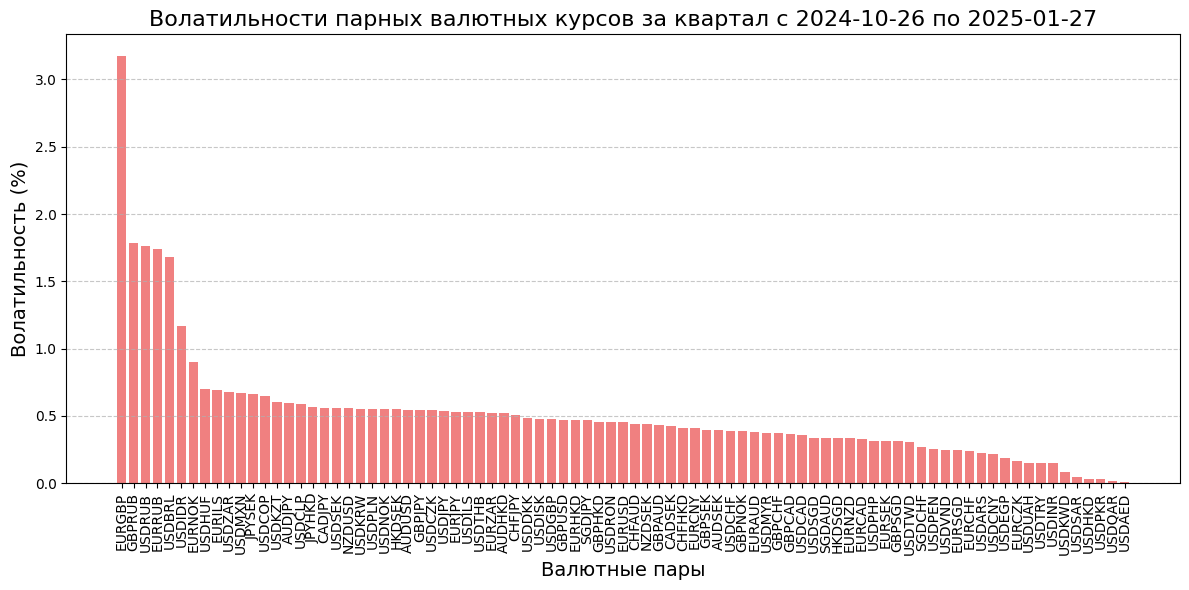

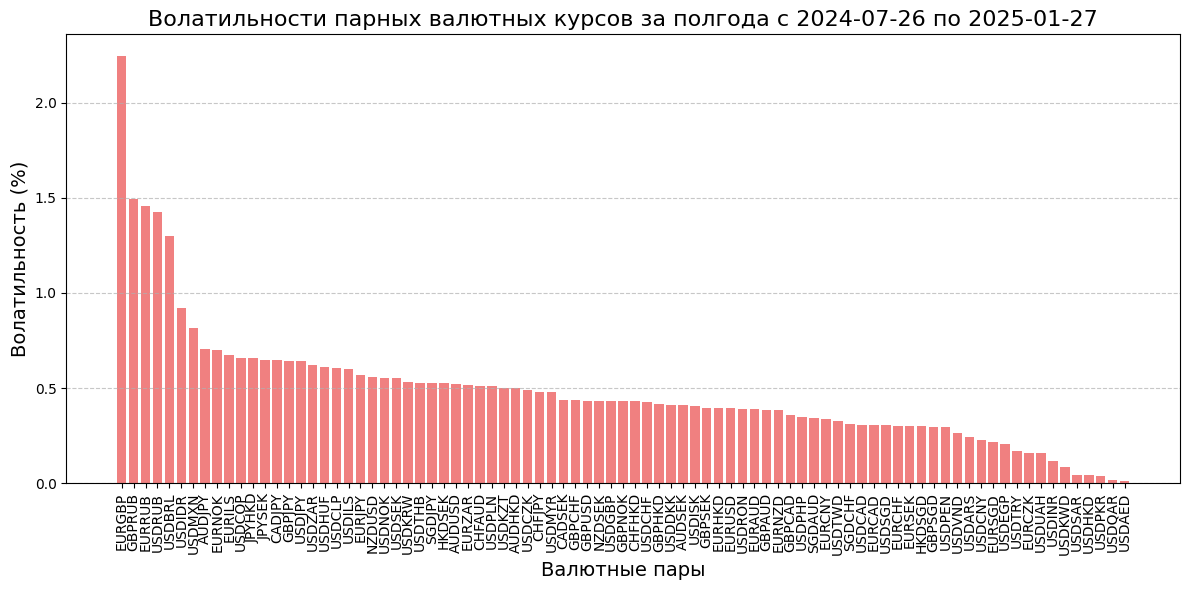

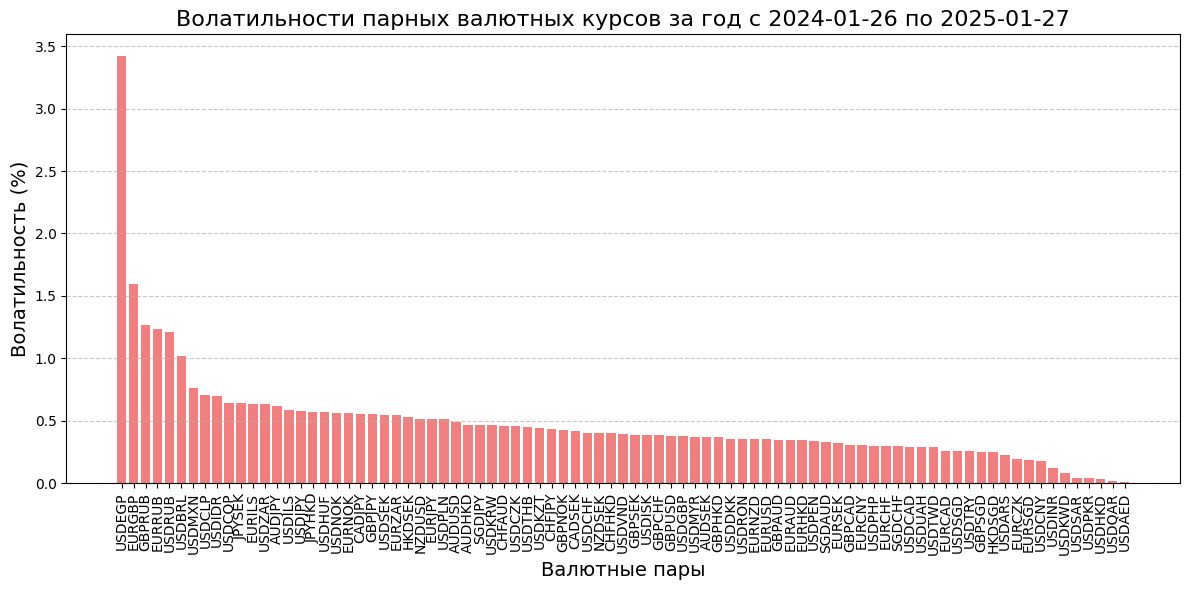

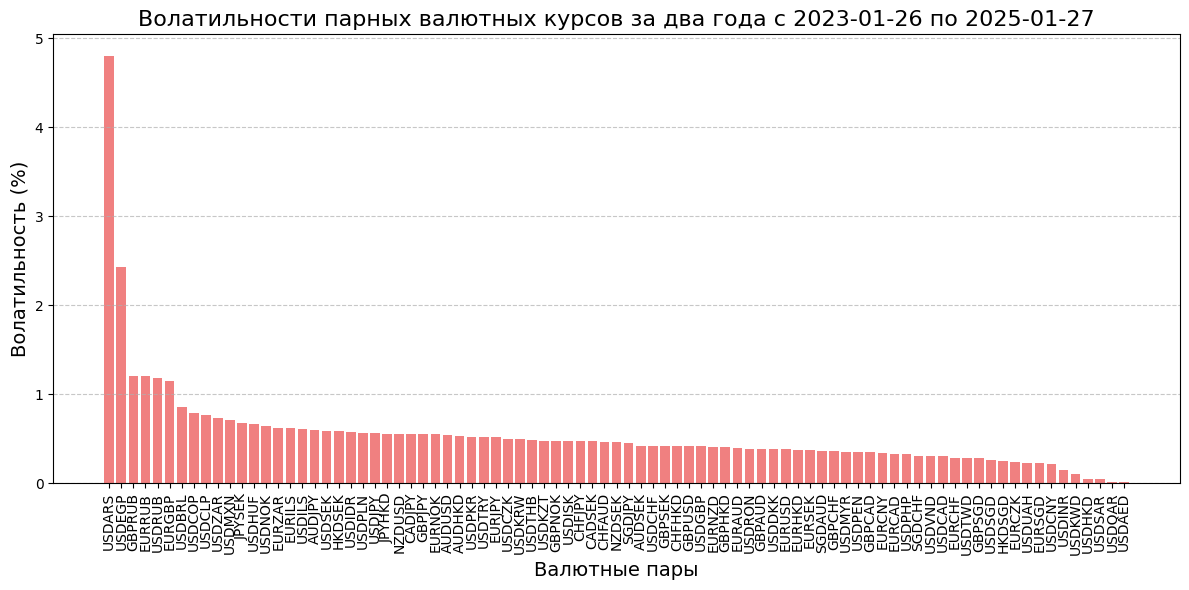

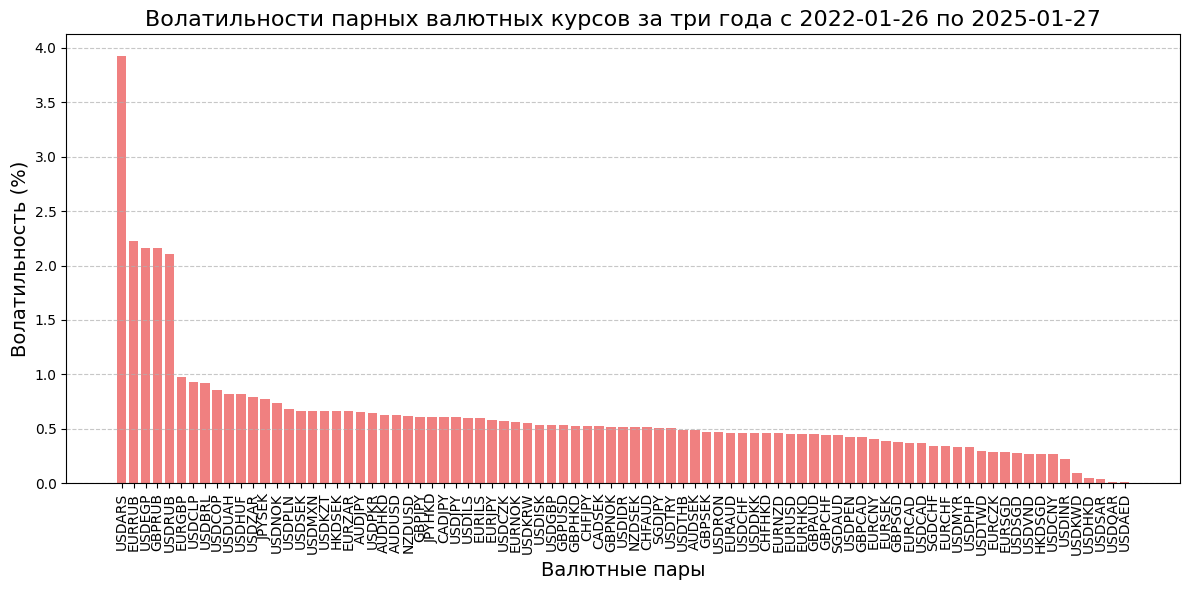

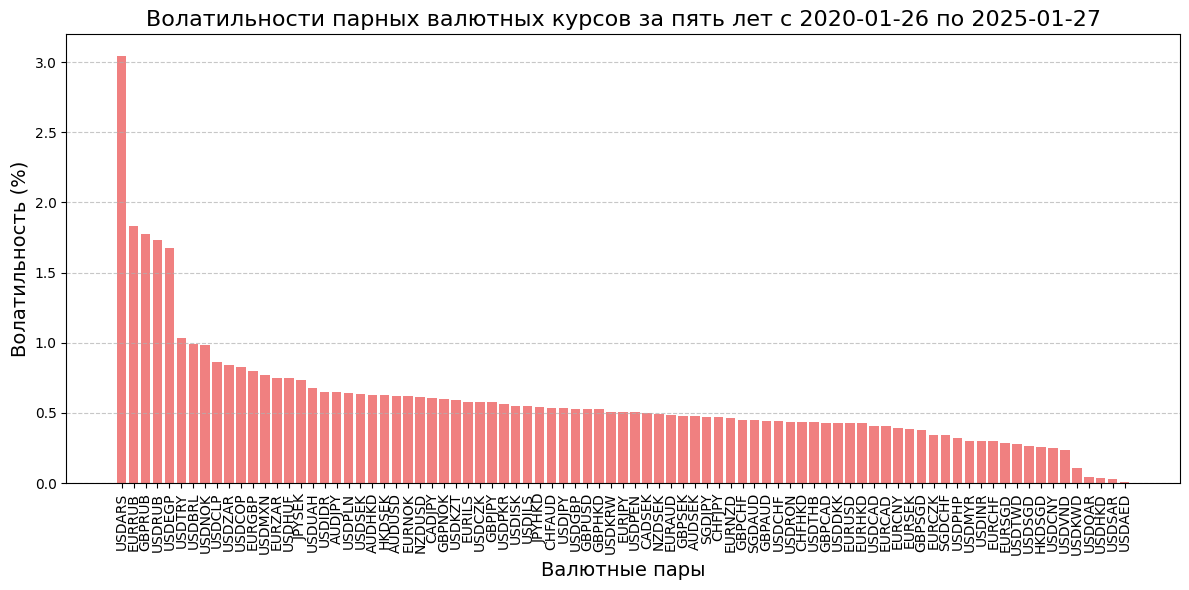

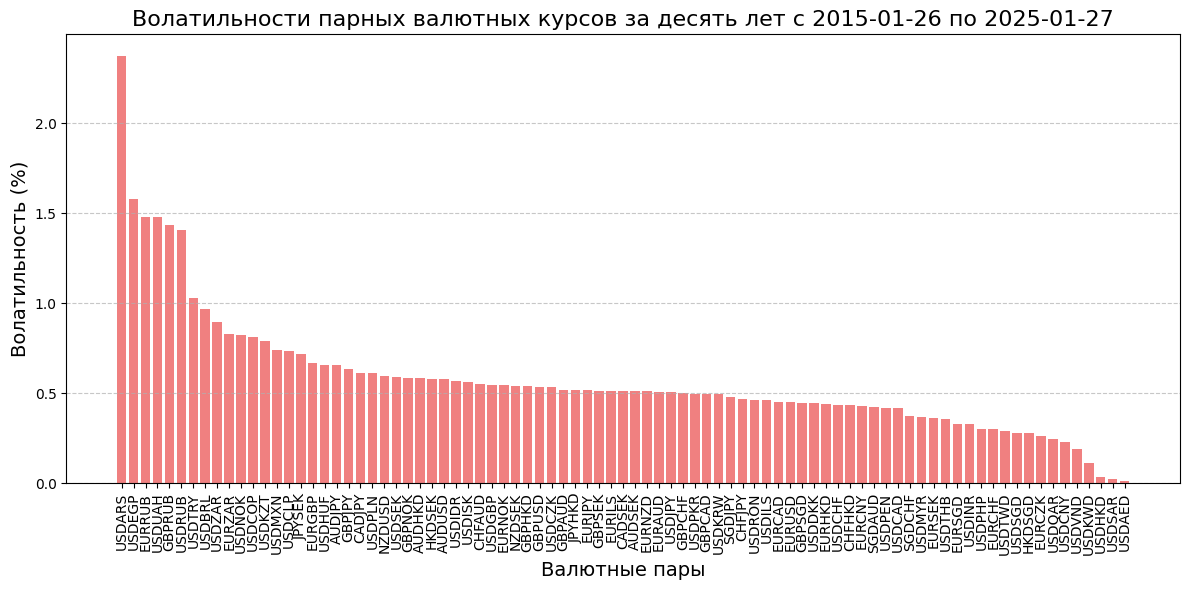

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация столбчатых диаграмм для каждого диапазона волатильности
for range_name in volatilities.columns:  # Цикл по колонкам (диапазонам)
    plt.figure(figsize=(12, 6))
    
    # Сортируем значения по убыванию
    sorted_values = volatilities[range_name].sort_values(ascending=False)
    
    # Создаем столбчатую диаграмму
    plt.bar(sorted_values.index, sorted_values.values, color='lightcoral')
    
    # Определяем границы диапазона
    start_date = ago_dates[range_name]
    end_date = all_pairs.index.max() + pd.Timedelta(days=1)  # Конец диапазона
    
    # Настройки графика с границами диапазонов в заголовке
    plt.title(f'Волатильности парных валютных курсов за {range_name} с {start_date.date()} по {end_date.date()}', fontsize=16)
    plt.xlabel('Валютные пары', fontsize=14)
    plt.ylabel('Волатильность (%)', fontsize=14)
    
    # Поворот меток на оси X на 90 градусов
    plt.xticks(rotation=90)
    
    # Добавляем сетку для удобства чтения графика
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Отображаем график
    plt.tight_layout()
    plt.show()

# Генерация MD кода

In [5]:
import pandas as pd

# Генерация MD-кода для таблицы std_devs
md_table = volatilities.to_markdown(index=True)

print(md_table)

|        |   месяц |   квартал |   полгода |    год |   два года |   три года |   пять лет |   десять лет |
|:-------|--------:|----------:|----------:|-------:|-----------:|-----------:|-----------:|-------------:|
| AUDHKD |  0.4069 |    0.5202 |    0.498  | 0.4682 |     0.526  |     0.6234 |     0.629  |       0.5826 |
| AUDJPY |  0.4022 |    0.5944 |    0.7047 | 0.6157 |     0.5968 |     0.6515 |     0.6506 |       0.6546 |
| AUDSEK |  0.3572 |    0.3933 |    0.4092 | 0.3706 |     0.4213 |     0.4887 |     0.4761 |       0.5108 |
| AUDUSD |  0.4012 |    0.5428 |    0.5226 | 0.4931 |     0.5427 |     0.6233 |     0.6223 |       0.5794 |
| CADJPY |  0.4176 |    0.5614 |    0.6449 | 0.557  |     0.5496 |     0.61   |     0.6084 |       0.6123 |
| CADSEK |  0.3992 |    0.427  |    0.438  | 0.4145 |     0.471  |     0.5233 |     0.5004 |       0.5134 |
| CHFAUD |  0.2993 |    0.4414 |    0.5119 | 0.4597 |     0.4657 |     0.5119 |     0.535  |       0.5528 |
| CHFHKD |  0.3275 |    0.41

# Генерация HTML-кода

In [6]:
import pandas as pd

# Генерация HTML-кода для таблицы std_devs
html_table = volatilities.to_html(index=True, border=1, justify='right', escape=False)

# Добавление CSS для выравнивания и предотвращения переноса значений в ячейках
html_table = html_table.replace('<table', '<table style="table-layout: fixed; word-wrap: nowrap;"')

html_table = html_table.replace('\n', '')

# Выводим HTML-код
print(html_table)

<table style="table-layout: fixed; word-wrap: nowrap;" border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>месяц</th>      <th>квартал</th>      <th>полгода</th>      <th>год</th>      <th>два года</th>      <th>три года</th>      <th>пять лет</th>      <th>десять лет</th>    </tr>  </thead>  <tbody>    <tr>      <th>AUDHKD</th>      <td>0.4069</td>      <td>0.5202</td>      <td>0.4980</td>      <td>0.4682</td>      <td>0.5260</td>      <td>0.6234</td>      <td>0.6290</td>      <td>0.5826</td>    </tr>    <tr>      <th>AUDJPY</th>      <td>0.4022</td>      <td>0.5944</td>      <td>0.7047</td>      <td>0.6157</td>      <td>0.5968</td>      <td>0.6515</td>      <td>0.6506</td>      <td>0.6546</td>    </tr>    <tr>      <th>AUDSEK</th>      <td>0.3572</td>      <td>0.3933</td>      <td>0.4092</td>      <td>0.3706</td>      <td>0.4213</td>      <td>0.4887</td>      <td>0.4761</td>      <td>0.5108</td>    </tr>    <tr>      <th>AUDUSD</th>      